Manufactured Solution experiment based on SAND2000 - 1444

Test based on heat flux example in SAND2000 - 1444 Section 3

In [1]:
%matplotlib inline

In [2]:
import fipy as fp

In [11]:
from sympy import symbols, sin, exp, sqrt, init_printing

In [12]:
from sympy import diff, simplify, Eq, lambdify

In [13]:
init_printing(use_unicode=True)

In [14]:
x, y, z, t = symbols('x y z t')

In [15]:
T0, R, t0, k0, rho0, Cp0 = symbols('T0 R t0 k0 rho0 Cp0')

In [16]:
T_sym = T0 * (1 + sin(x/R)**2 * sin(2*y/R)**2 * sin(3*z/R)**2) * exp(t*(t0-t)/t0)

In [17]:
k_sym = k0 

In [18]:
rho_sym = rho0 

In [19]:
Cp_sym = Cp0 

In [20]:
g_sym = \
simplify(diff(Cp_sym * rho_sym * T_sym, t)
         - diff(k_sym * diff(T_sym, x), x) 
         - diff(k_sym * diff(T_sym, y), y)
         - diff(k_sym * diff(T_sym, z), z))

In [21]:
g_sym

T0*(-Cp0*R**2*rho0*(2*t - t0)*(sin(x/R)**2*sin(2*y/R)**2*sin(3*z/R)**2 + 1) + 2*k0*t0*(14*sin(x/R)**2*sin(2*y/R)**2*sin(3*z/R)**2 - 9*sin(x/R)**2*sin(2*y/R)**2*cos(3*z/R)**2 - 4*sin(x/R)**2*sin(3*z/R)**2*cos(2*y/R)**2 - sin(2*y/R)**2*sin(3*z/R)**2*cos(x/R)**2))*exp(-t*(t - t0)/t0)/(R**2*t0)

In [22]:
subs = [(R, 3.33), (T0, 100), (Cp0, 1), (rho0, 0), (k0, 1), (t0, 1)]

In [23]:
g_sub = g_sym.subs(subs)

In [24]:
g_fp = lambdify((x, y, z, t), g_sub, modules=fp.numerix)

In [25]:
T_sub = T_sym.subs(subs)

In [26]:
T_fp = lambdify((x, y, z, t), T_sub, modules=fp.numerix)

In [27]:
k_sub = k_sym.subs(subs)

In [28]:
k_fp = lambdify((x, y, z, t), k_sub, modules=fp.numerix)

In [29]:
rho_sub = rho_sym.subs(subs)

In [30]:
rho_fp = lambdify((x, y, z, t), rho_sub, modules=fp.numerix)

In [31]:
Cp_sub = Cp_sym.subs(subs)

In [32]:
Cp_fp = lambdify((x, y, z, t), Cp_sub, modules=fp.numerix)

In [33]:
mesh = fp.Grid2D(Lx=10., dx=.1, Ly=20., dy=.1)

In [34]:
xx, yy = mesh.cellCenters[0], mesh.cellCenters[1]

In [35]:
XX, YY = mesh.faceCenters[0], mesh.faceCenters[1]

In [36]:
zz = 5.

In [55]:
T = fp.CellVariable(mesh=mesh, name="$T$", value=T_fp(xx, yy, zz, 0.)*0.01, hasOld=True)

In [56]:
time = fp.Variable(name="$t$", value=0.)

In [57]:
T.constrain(T_fp(XX, YY, zz, time), where=mesh.exteriorFaces)

In [58]:
eq = (fp.DiffusionTerm(coeff=k_fp(XX, YY, zz, time)) + g_fp(xx, yy, zz, time) * mesh.cellVolumes
      == fp.TransientTerm(coeff=rho_fp(xx, yy, zz, time) * Cp_fp(xx, yy, zz, time)))

In [59]:
dt = 0.1

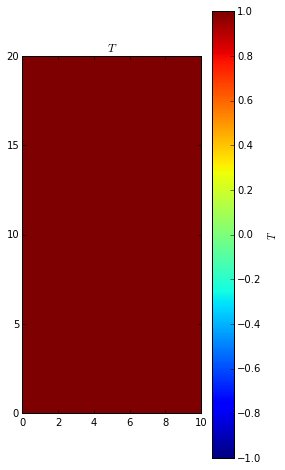

In [60]:
viewer = fp.Viewer(vars=T)

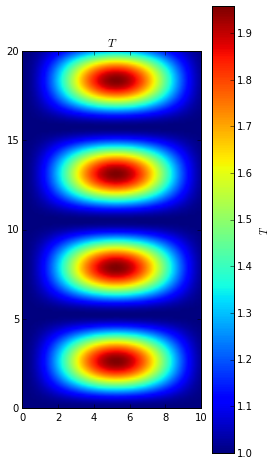

In [61]:
viewer.plot()

In [62]:
time.value = 0.

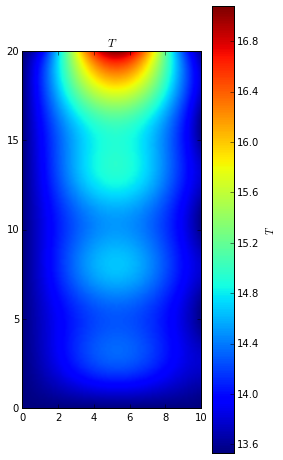

time =  2.0


In [83]:
T.updateOld()
eq.solve(var=T, dt=dt)
viewer.plot()
print "time = ", time
time.value = time() + dt

In [39]:
print min(T)

100.122358862


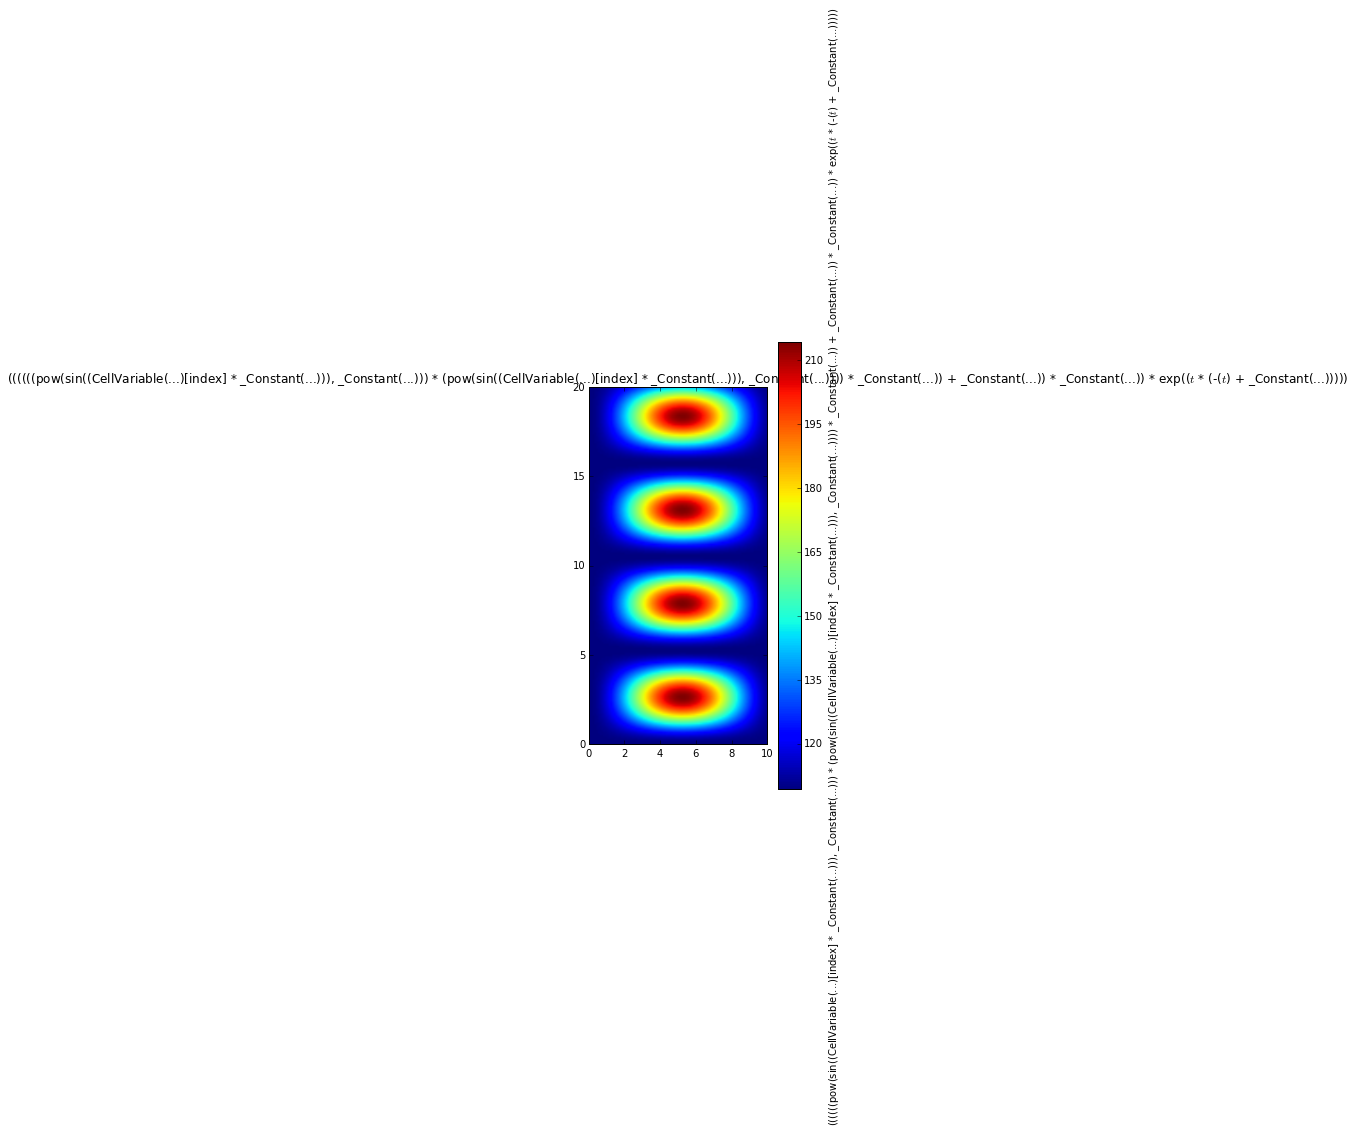

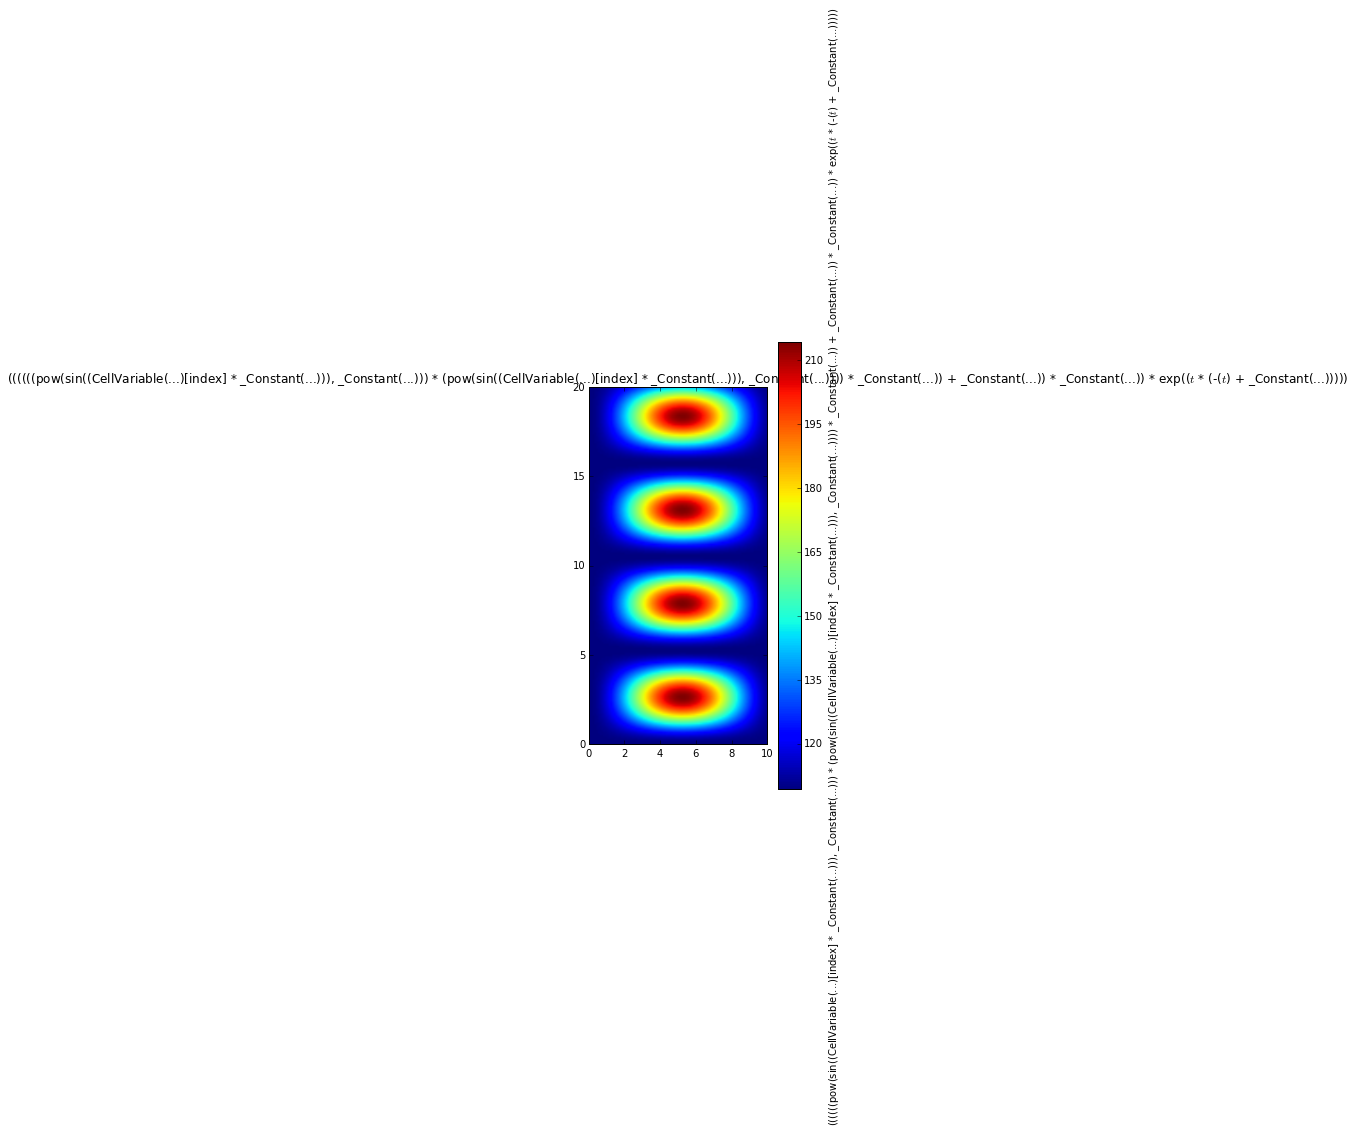

In [46]:
fp.Viewer(vars=T_fp(xx, yy, zz, time))

In [91]:
g_ms = g_fp(xx, yy, zz, time)

In [92]:
g_ms.name = "$g$"

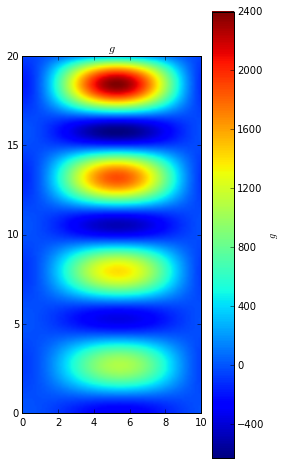

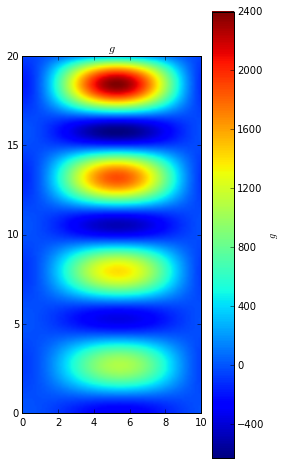

In [93]:
fp.Viewer(vars=g_ms)